# Bland-Altman Visualization for Technical Replicates

In [3]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent.resolve()))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from src.threshold import plot_uncertainty_at_threshold, plot_v_plot
from src.classifier import z_score, linear_classifier_score, antilogit_classifier_score, sample_single_patient

In [5]:
raw_data = pd.read_excel(
    "../../raw_data/ClusterMarkers_1819ADcohort.congregated_DR.xlsx", sheet_name=1
)
pathos = pd.read_excel(
    "../../raw_data/ClusterMarkers_1819ADcohort.congregated_DR.xlsx", sheet_name=0
)

In [6]:
pathos = pathos.set_index("Isolate ID")
raw_data = raw_data.set_index("gene_id")

In [7]:
patients_df = raw_data[~raw_data.loc[:, "Coeff"].isnull()]
coefficients = np.nan_to_num(np.array(patients_df.loc[:, "Coeff"]))
patients_df = patients_df.filter(regex=r"^\d+")

In [8]:
cols_with_replicates = list(set([col.split("-")[0] for col in patients_df.columns if col.endswith("r2")]))

In [11]:
def plot_bland_altman(method1, method2, title):
    # Compute the average and difference of the two methods
    mean_measurements = (method1 + method2) / 2.0
    differences = method1 - method2
    
    # Compute statistics
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    
    # Limits of agreement (mean difference ± 1.96*SD)
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff
    
    # Plot Bland-Altman plot
    plt.figure(figsize=(8, 5))
    plt.scatter(mean_measurements, differences, color='blue', alpha=0.7)
    plt.axhline(mean_diff, color='gray', linestyle='--', label=f"Mean diff = {mean_diff:.2f}")
    plt.axhline(loa_upper, color='red', linestyle='--', label=f"Upper LoA = {loa_upper:.2f}")
    plt.axhline(loa_lower, color='red', linestyle='--', label=f"Lower LoA = {loa_lower:.2f}")
    
    plt.xlabel("Mean of two measurements")
    plt.ylabel("Difference between measurements")
    plt.ylim([1.5 * loa_lower, 1.5 * loa_upper])
    plt.title(title)
    plt.legend()
    plt.savefig(f"{title}.png")

/tmp/ipykernel_550653/4061699870.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


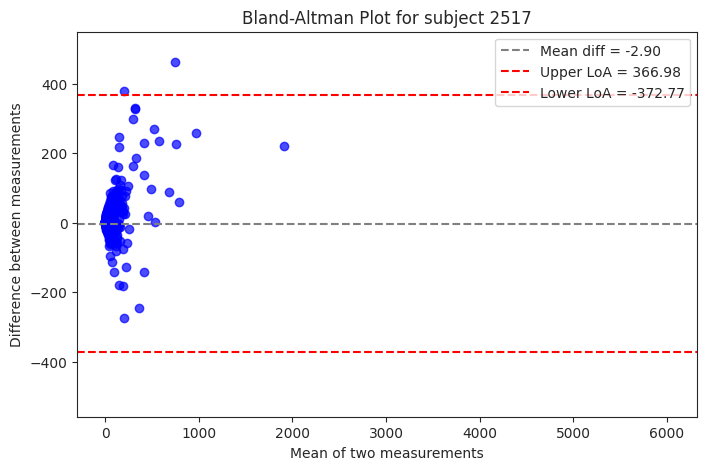

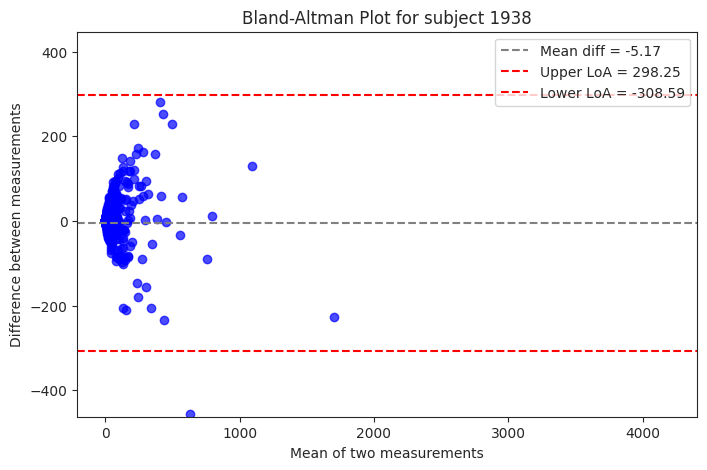

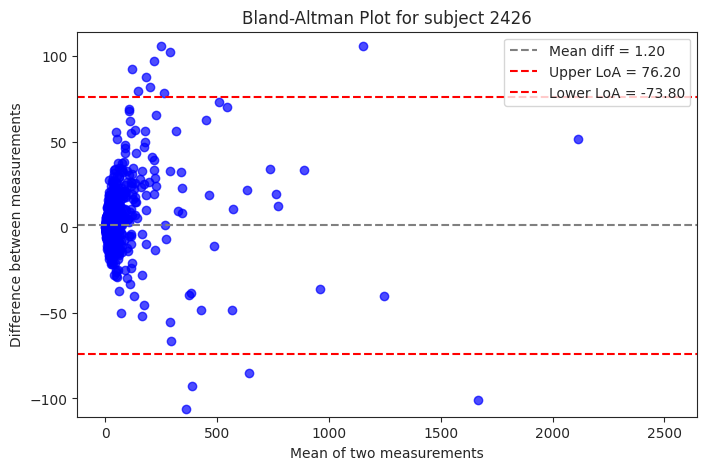

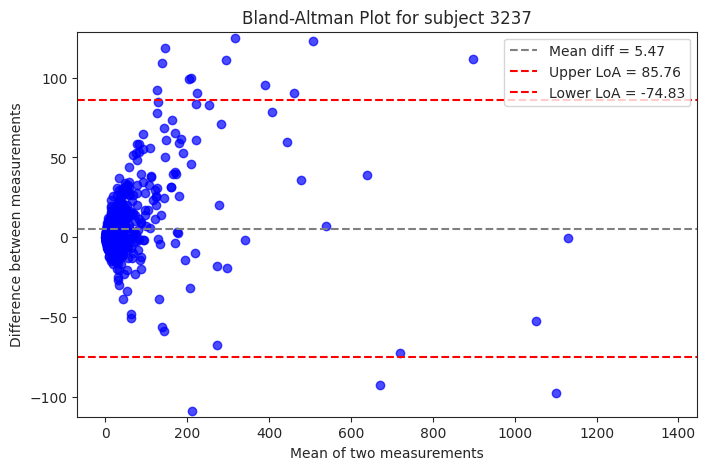

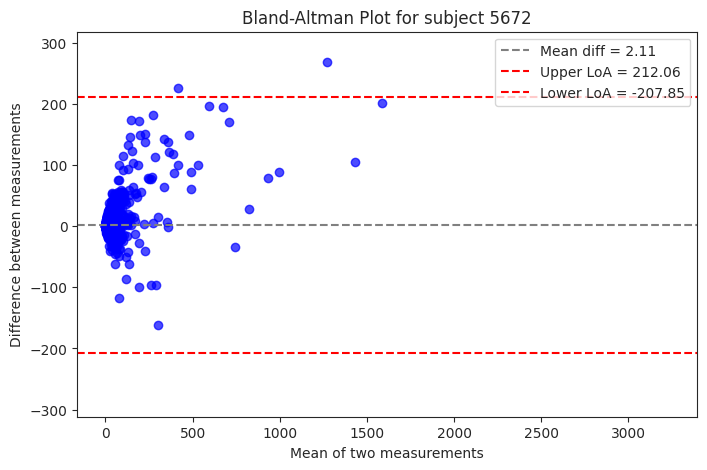

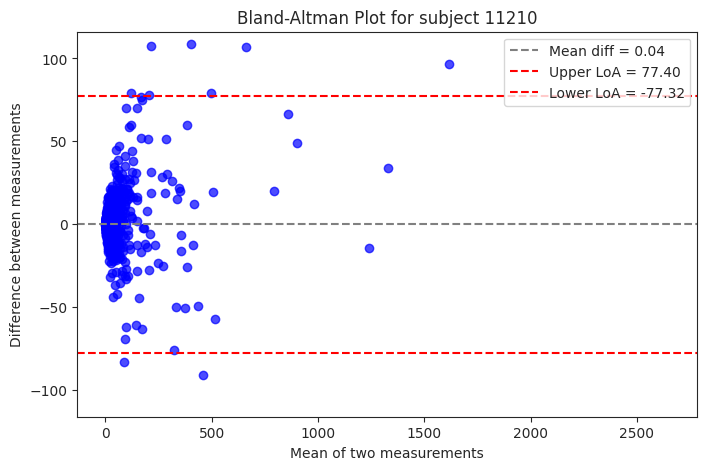

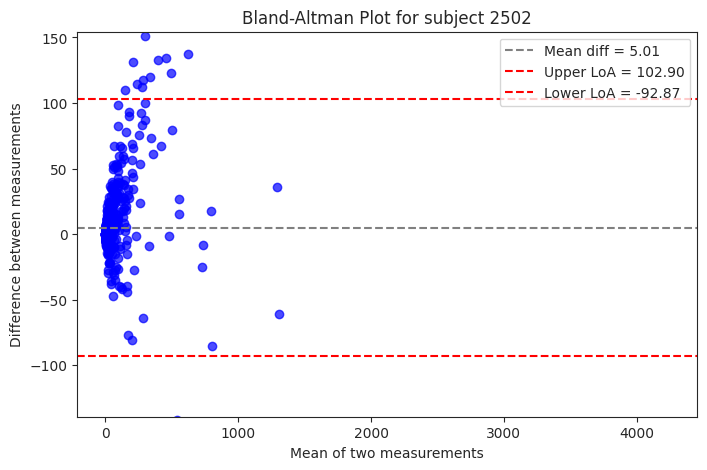

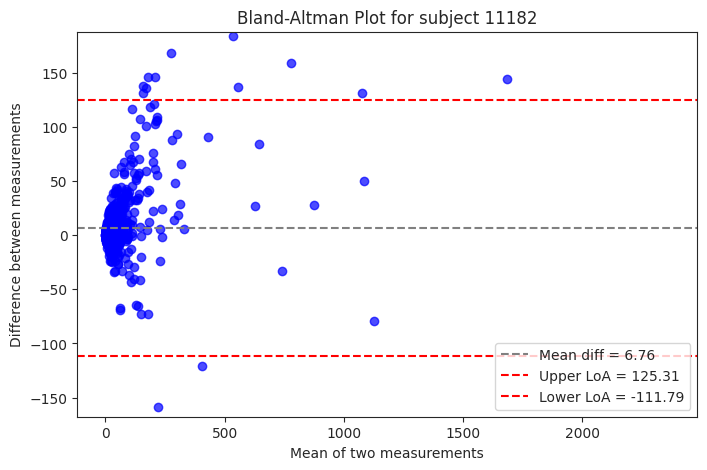

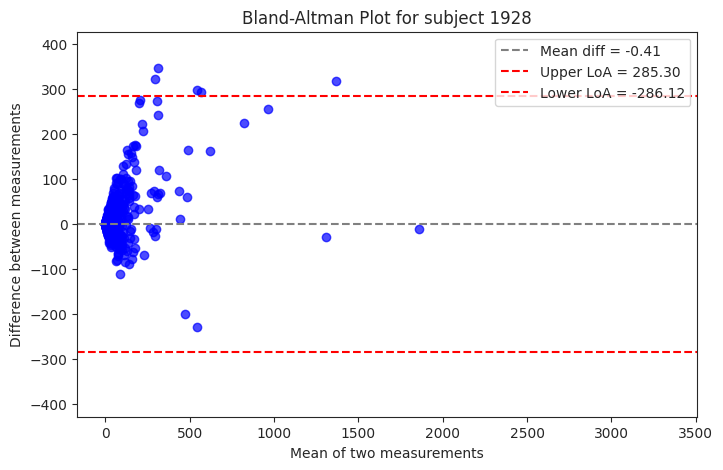

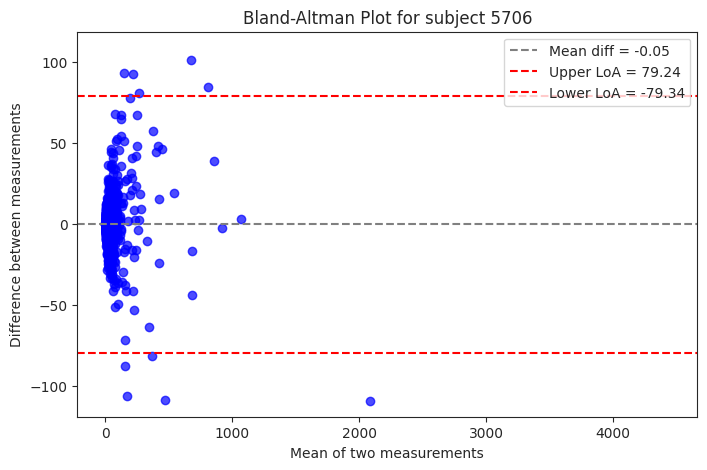

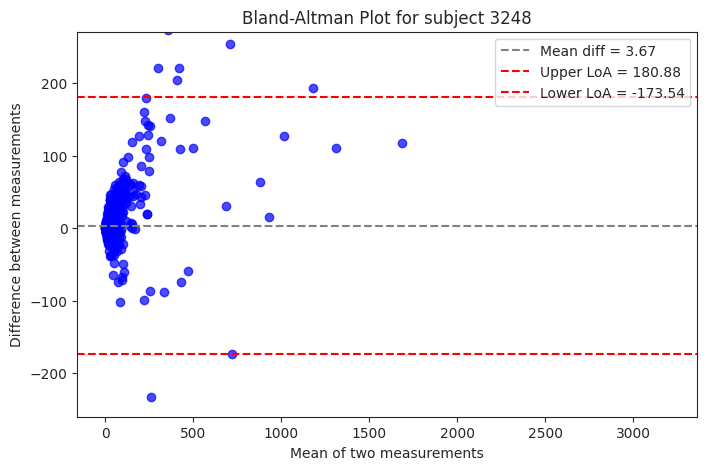

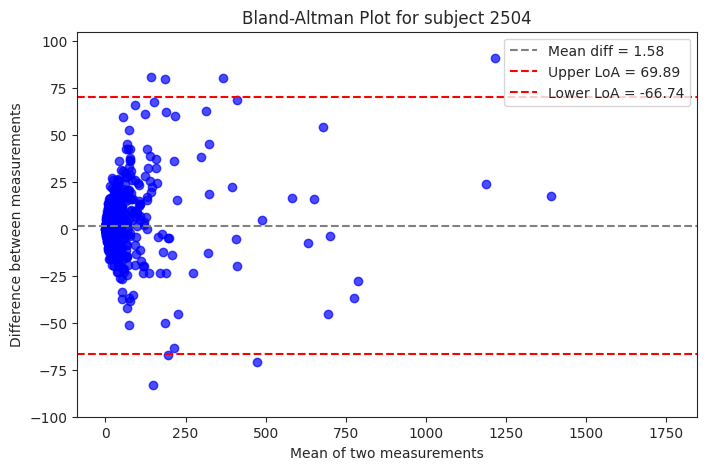

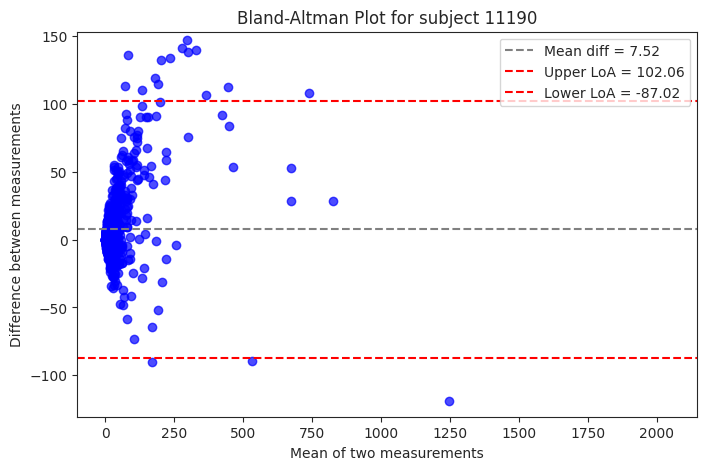

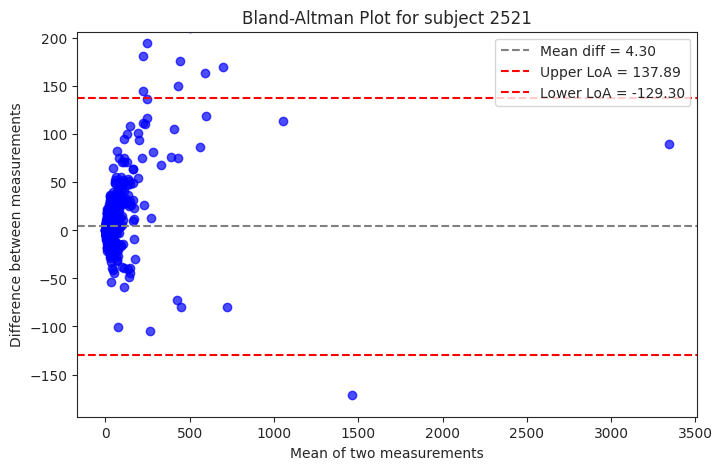

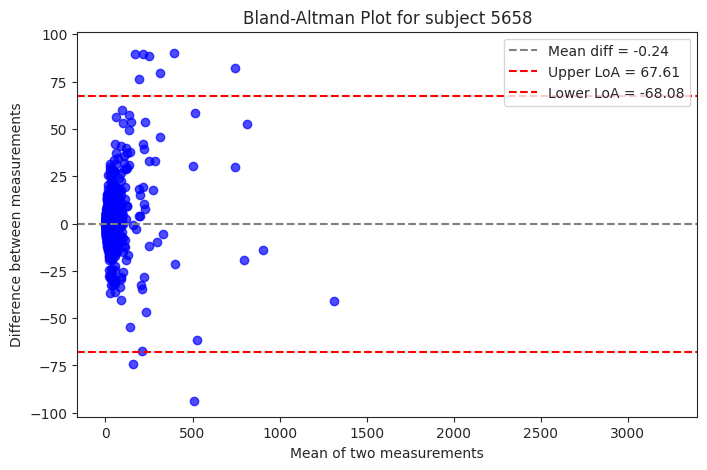

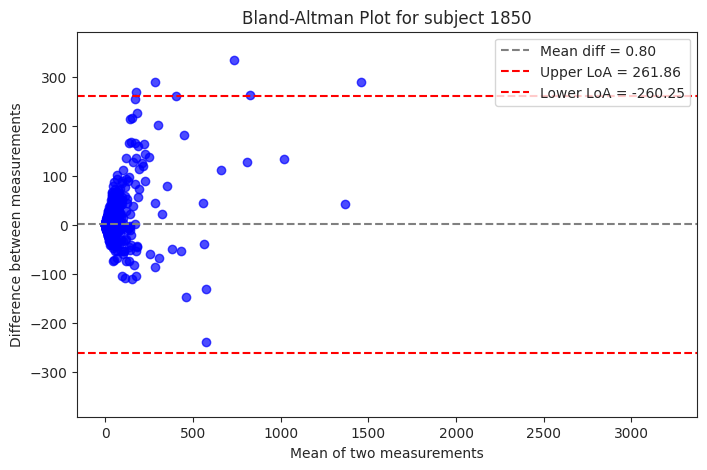

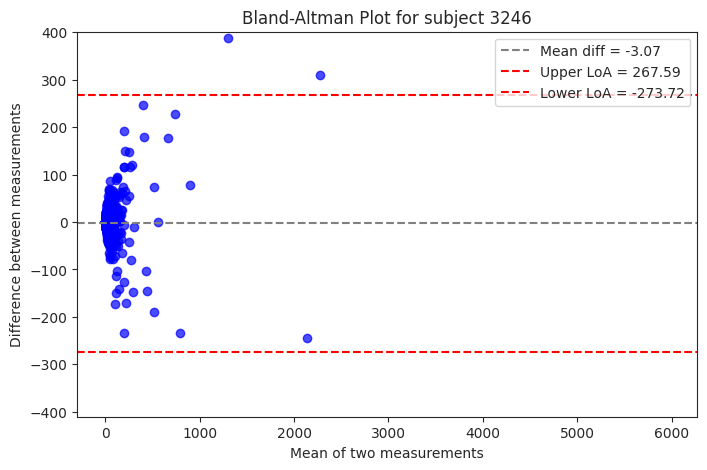

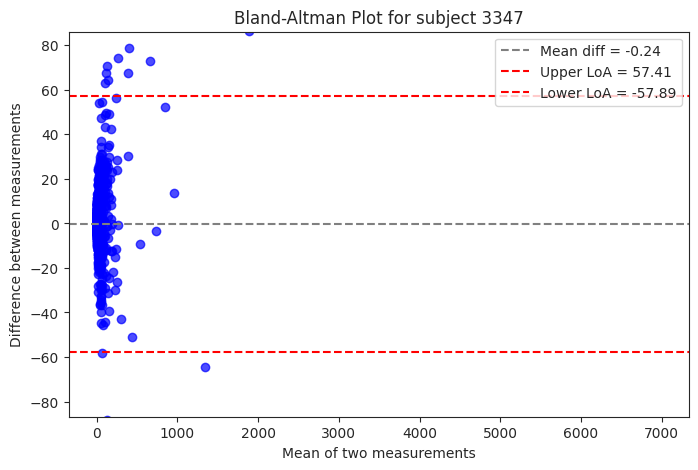

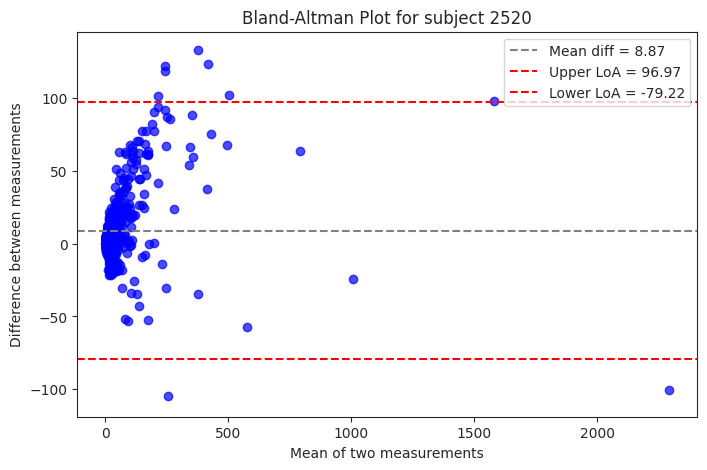

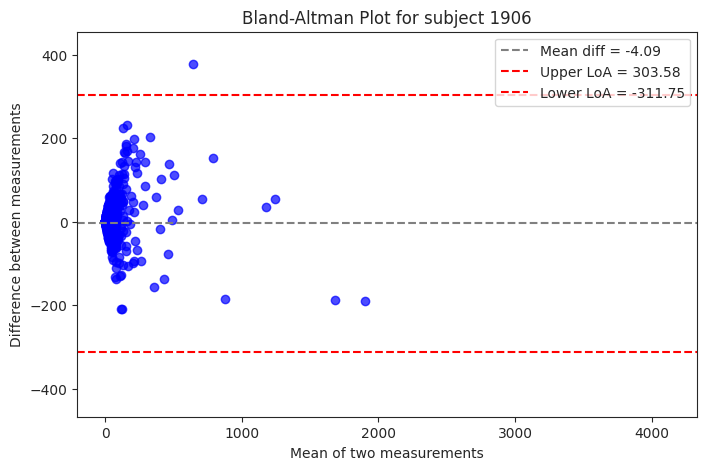

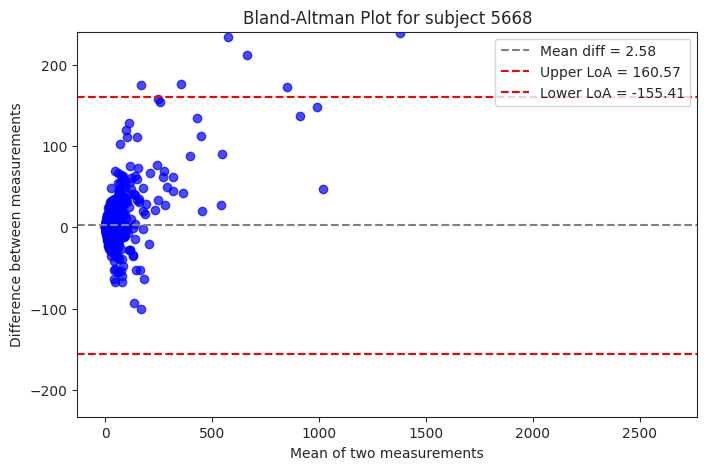

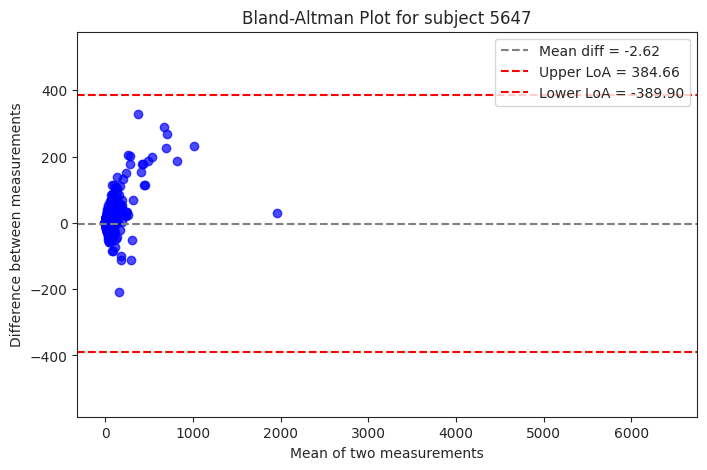

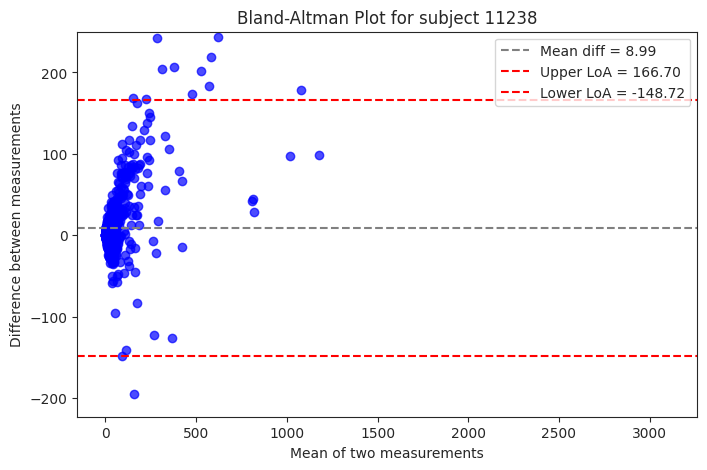

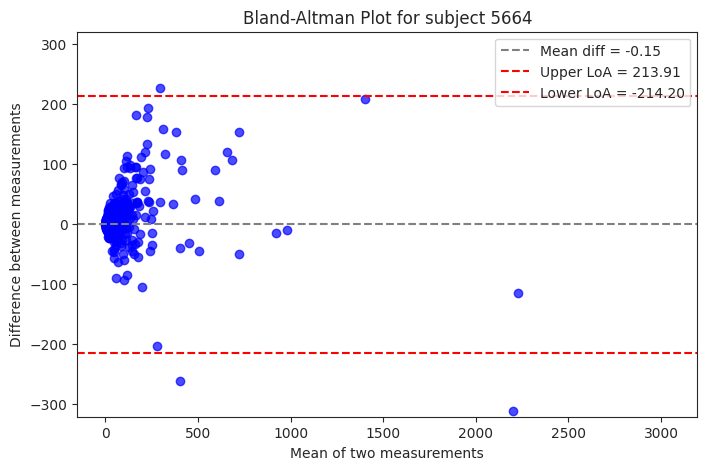

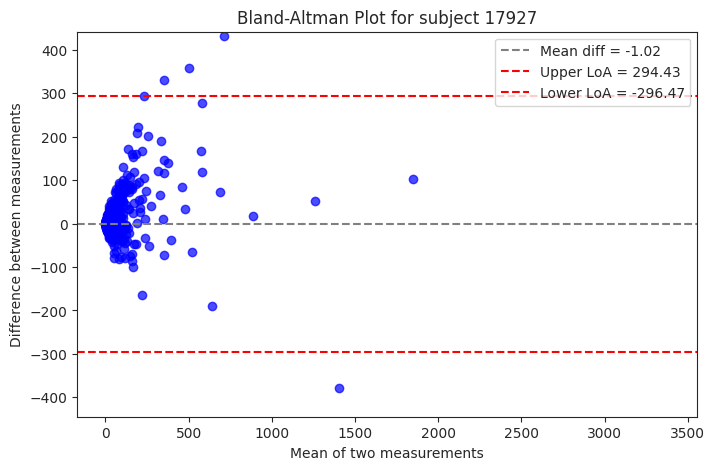

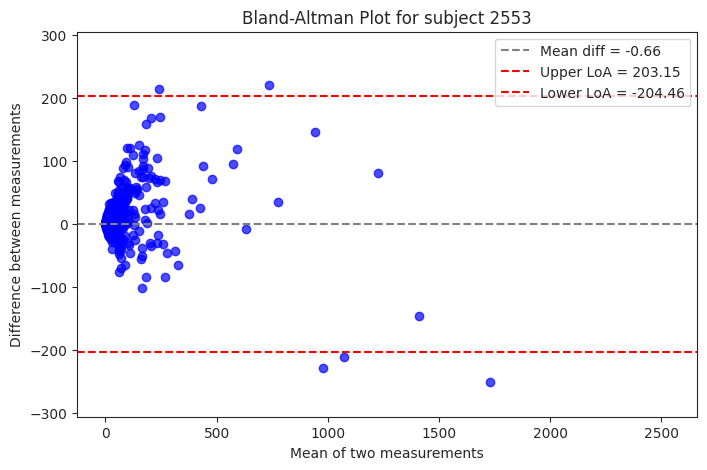

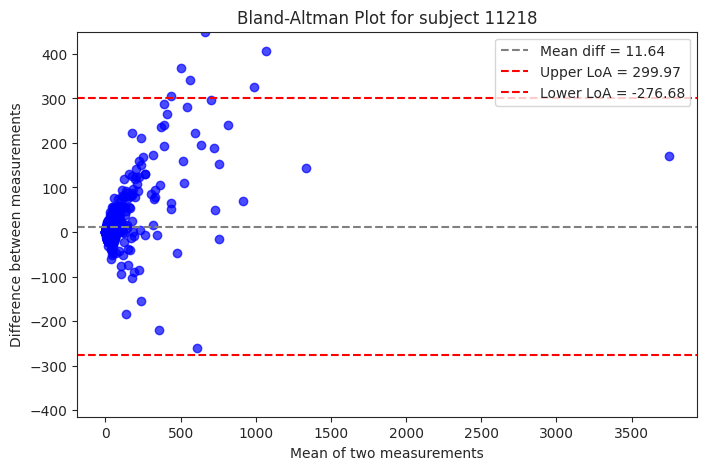

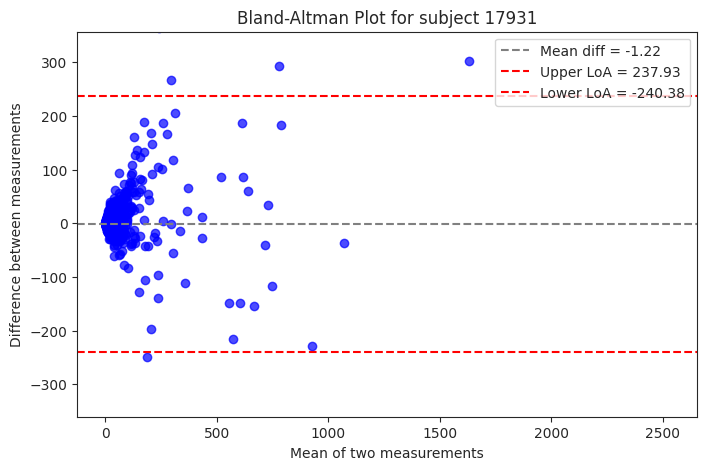

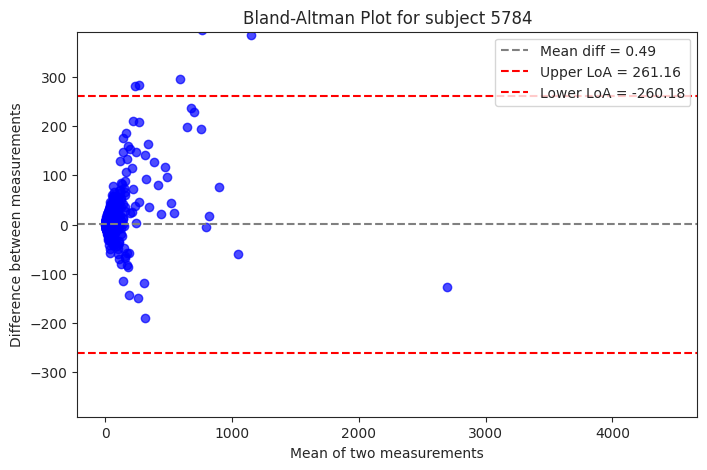

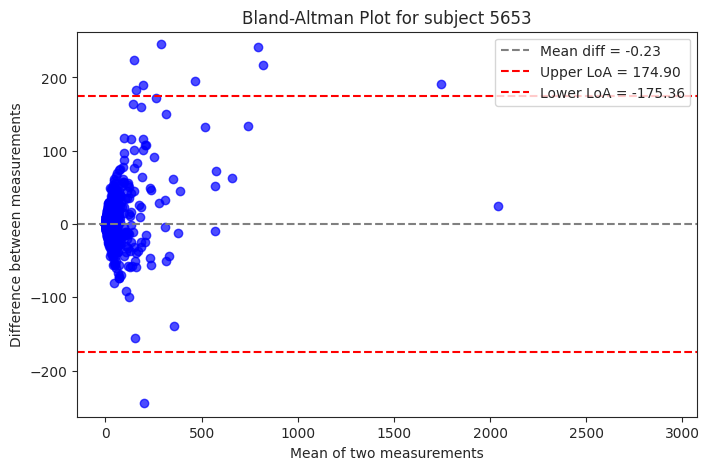

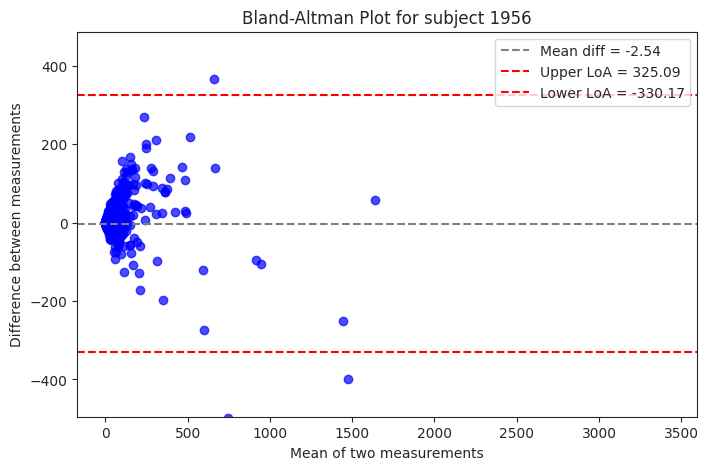

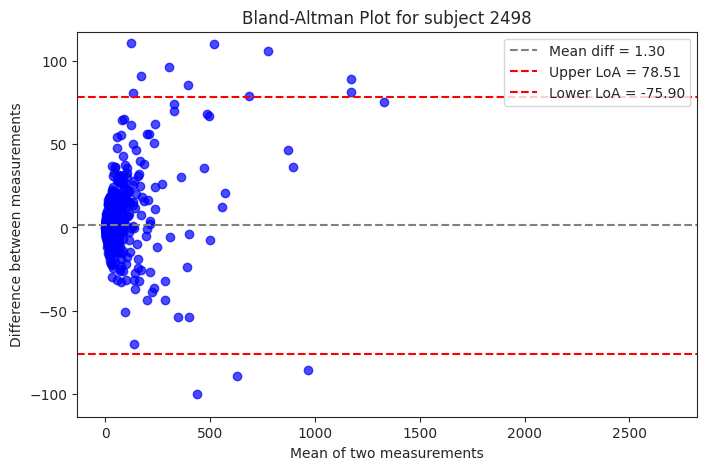

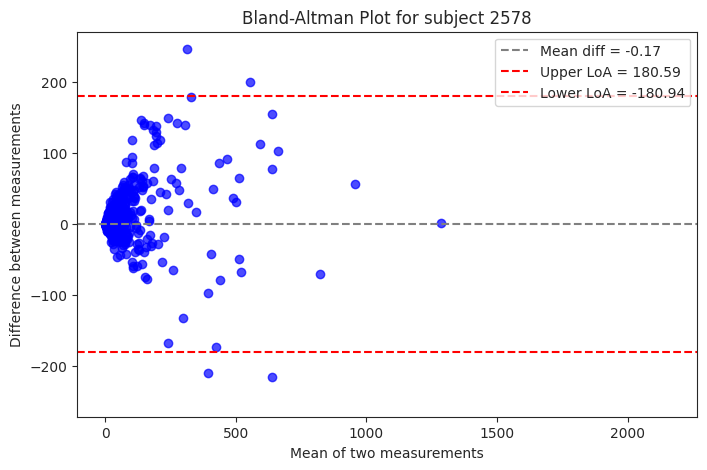

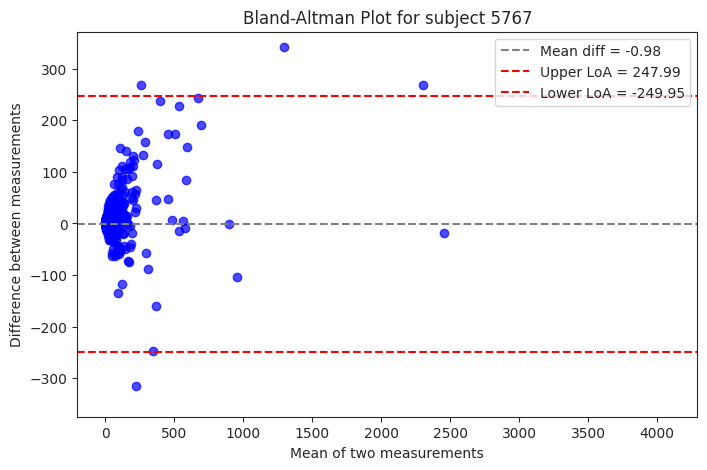

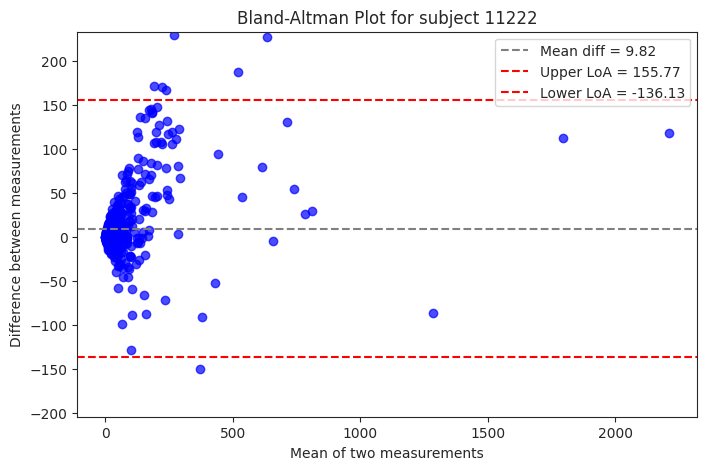

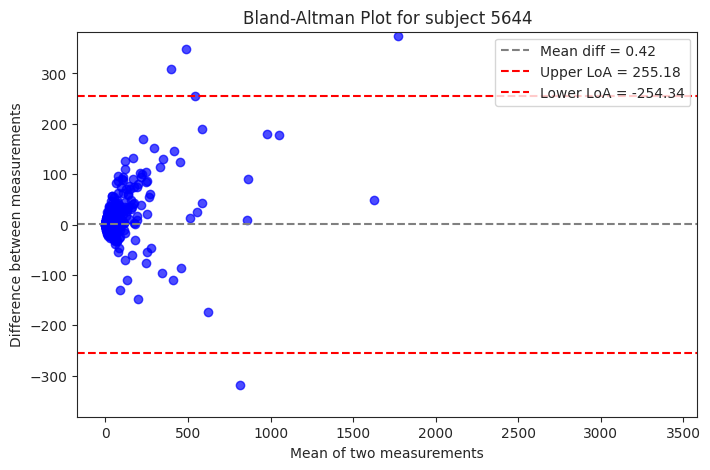

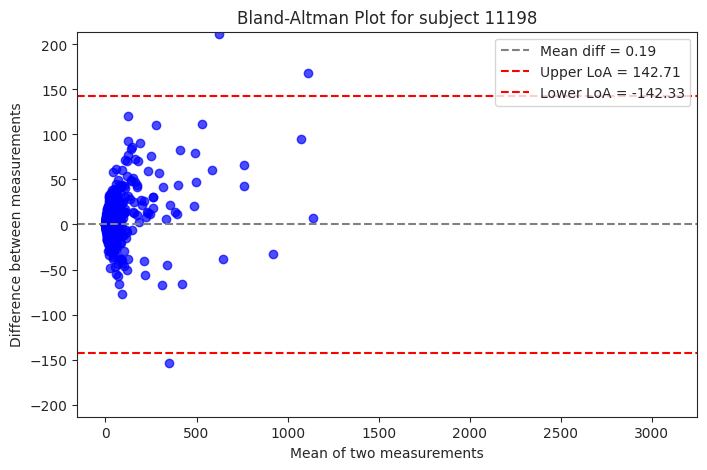

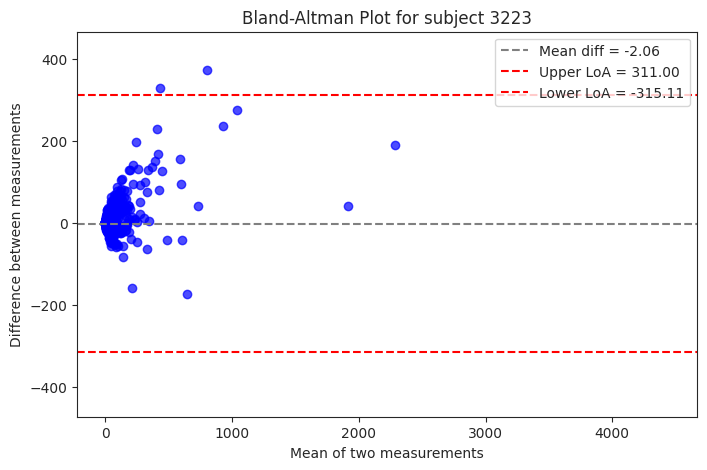

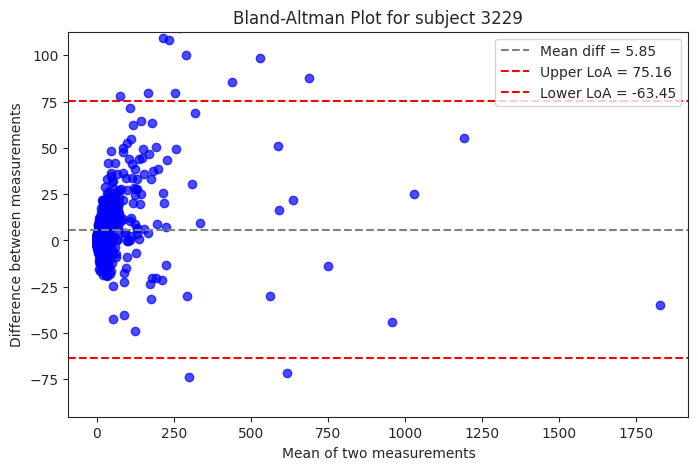

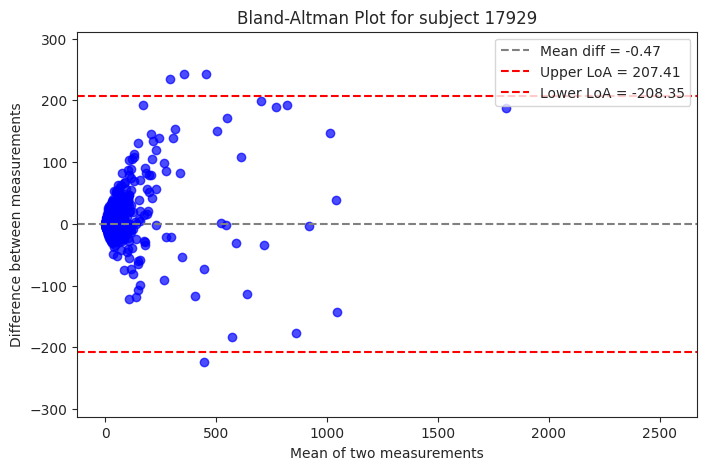

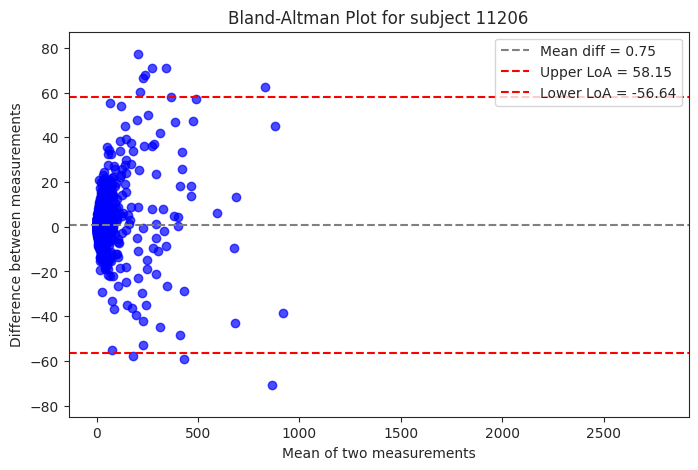

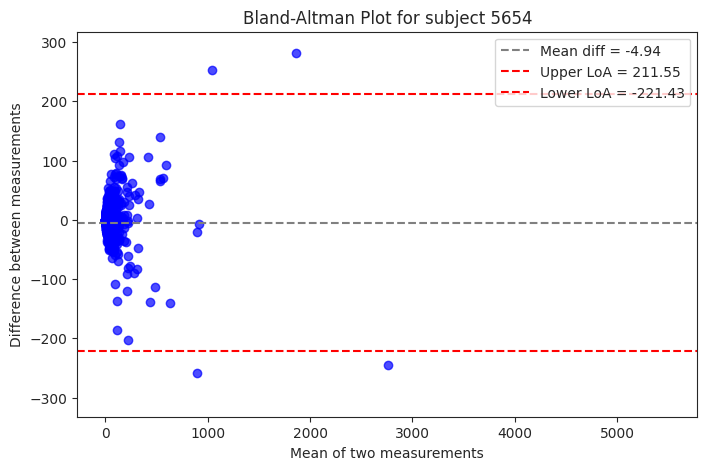

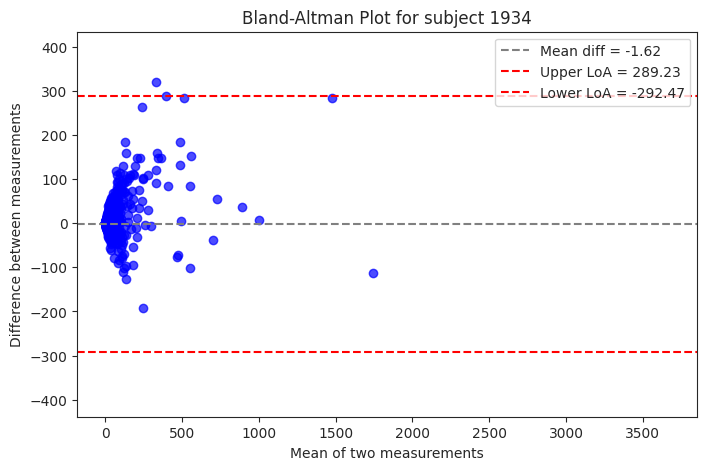

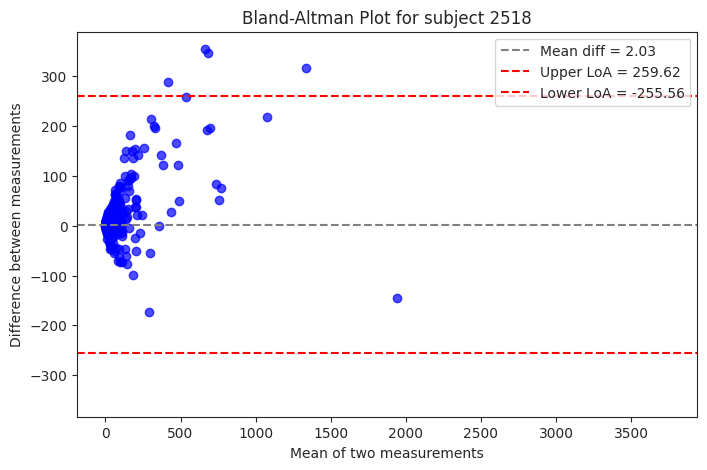

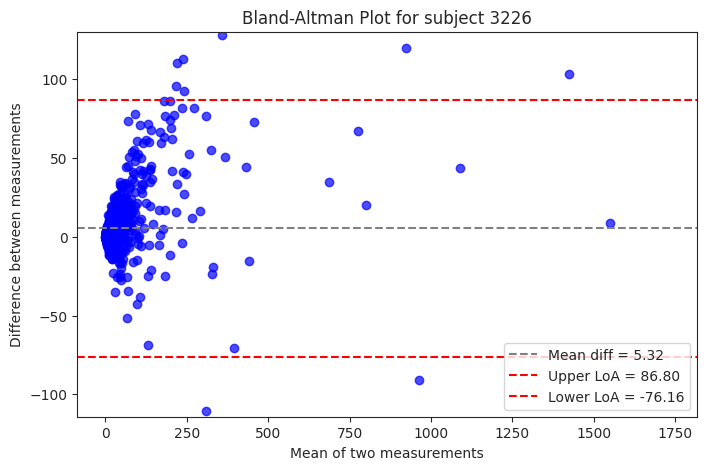

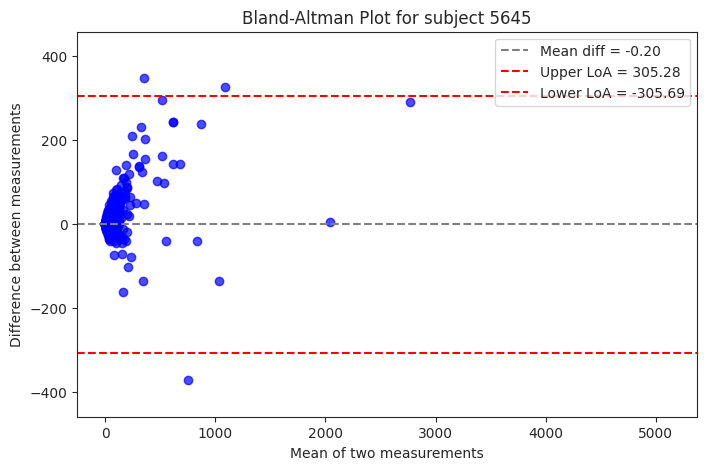

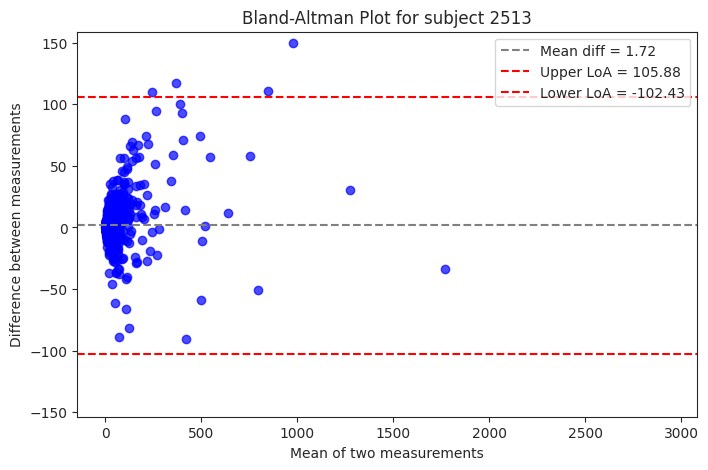

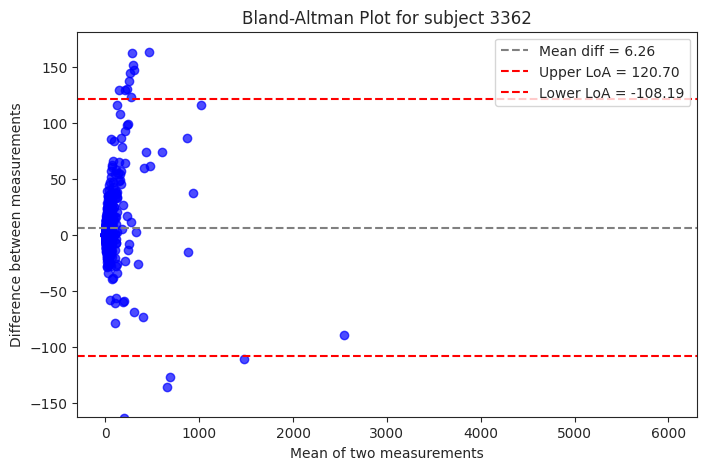

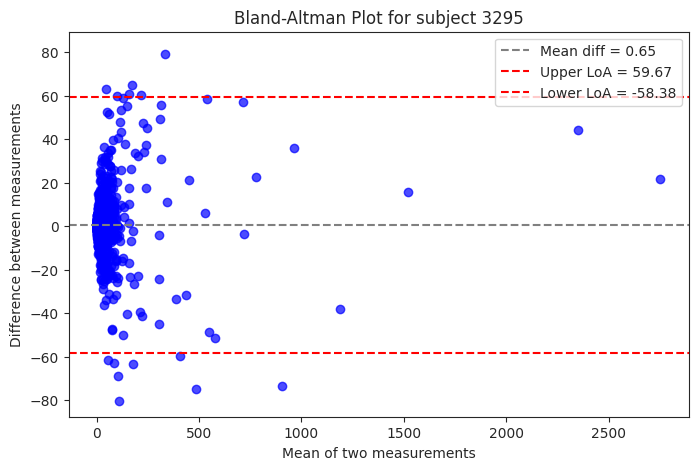

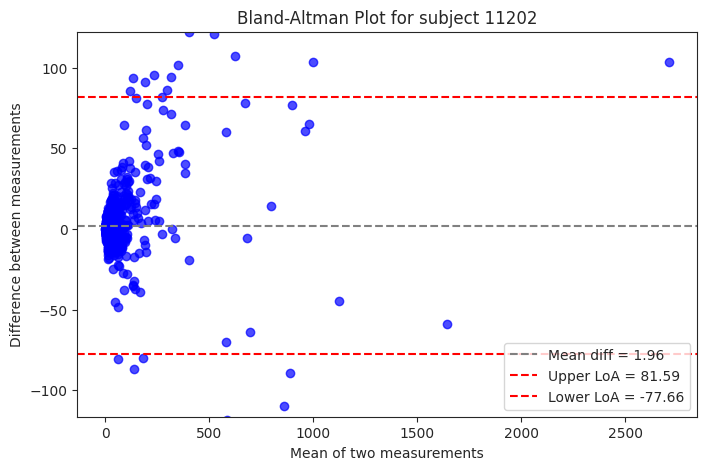

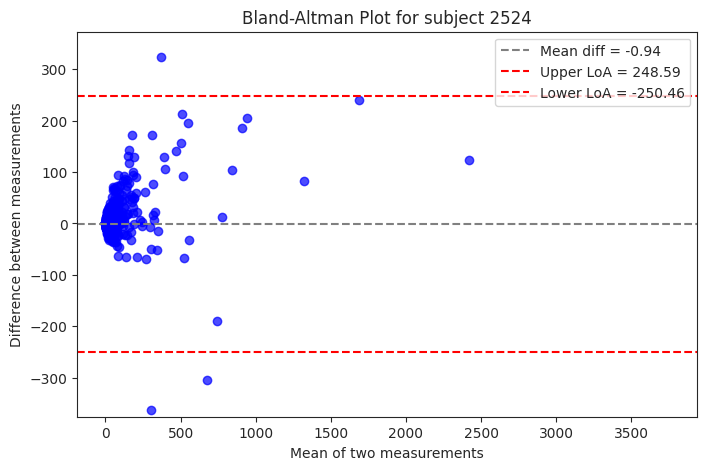

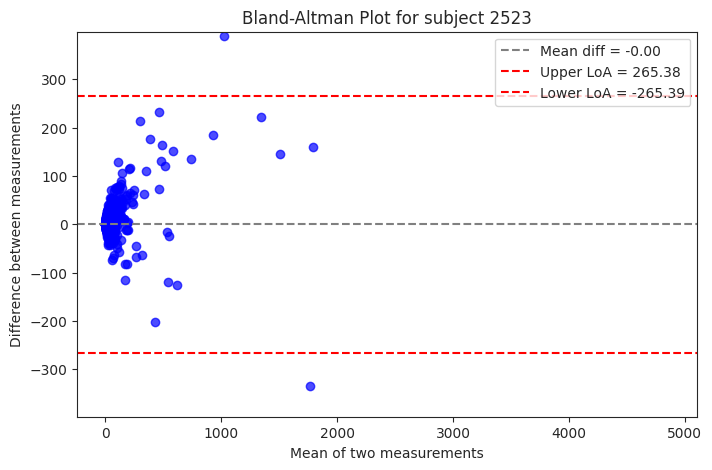

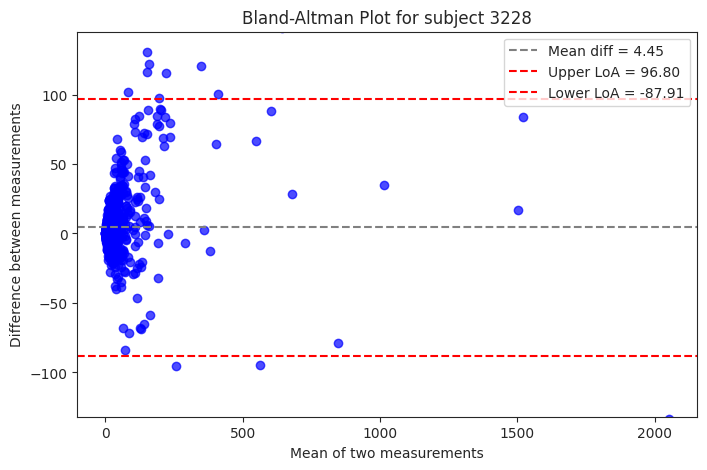

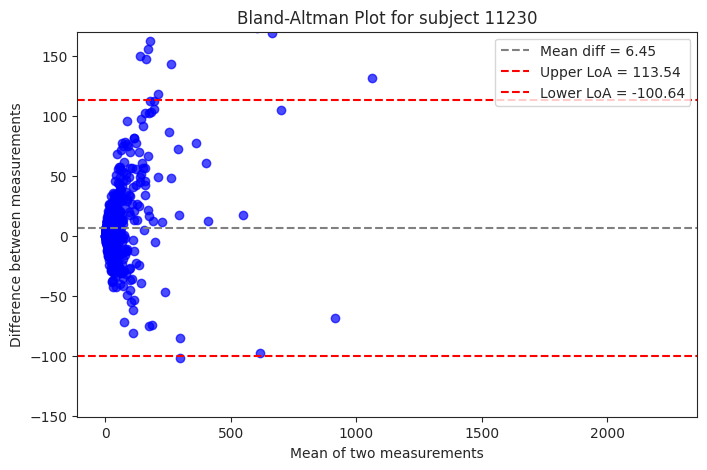

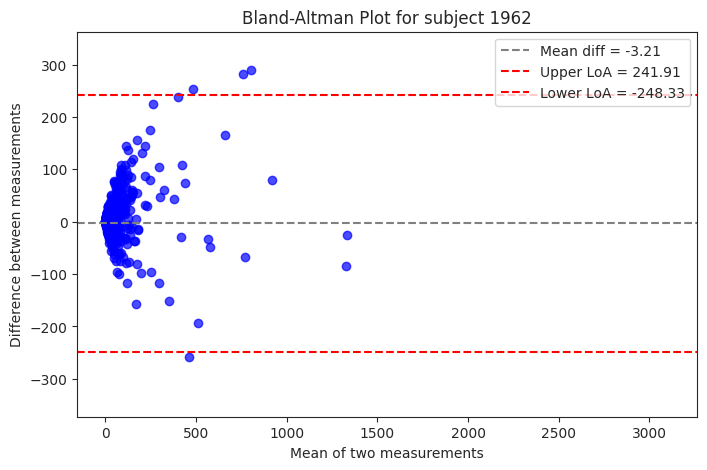

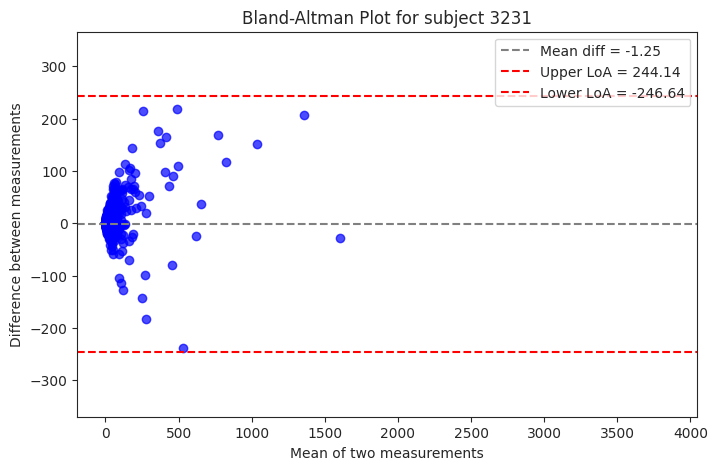

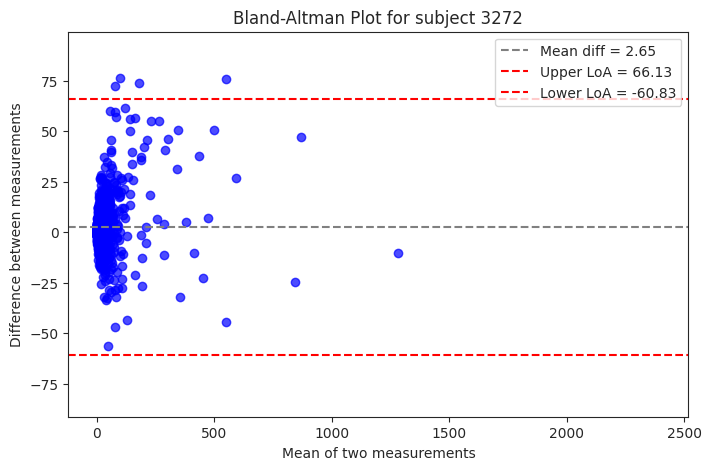

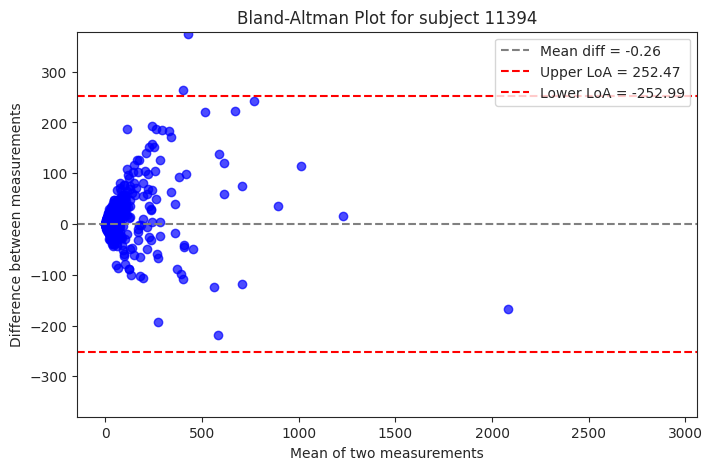

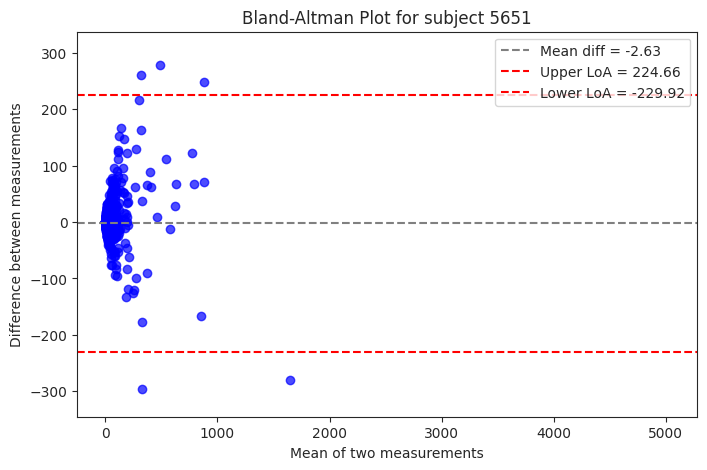

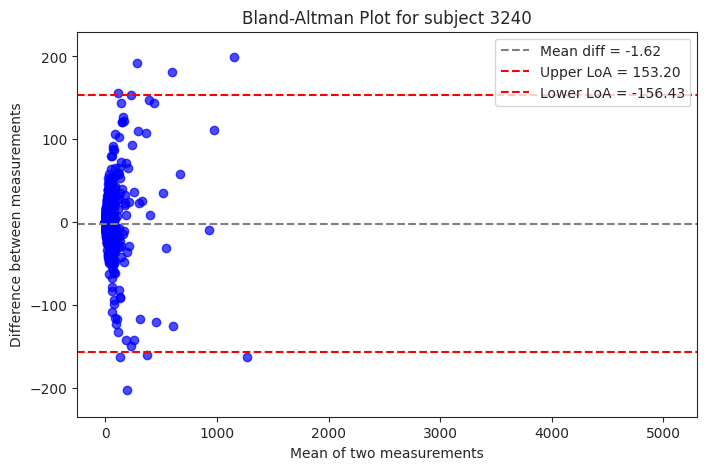

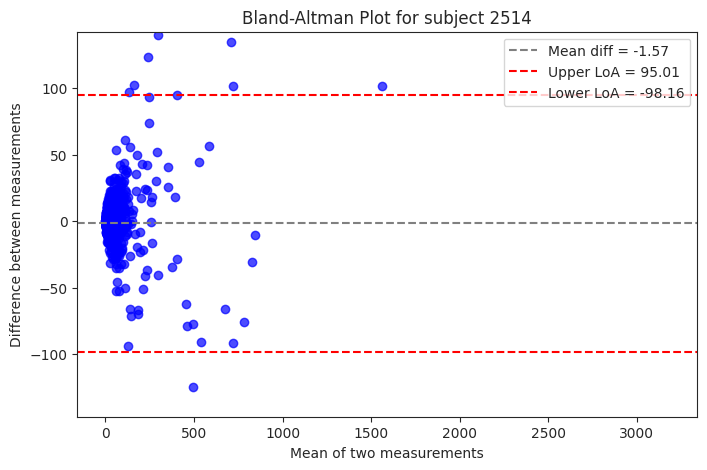

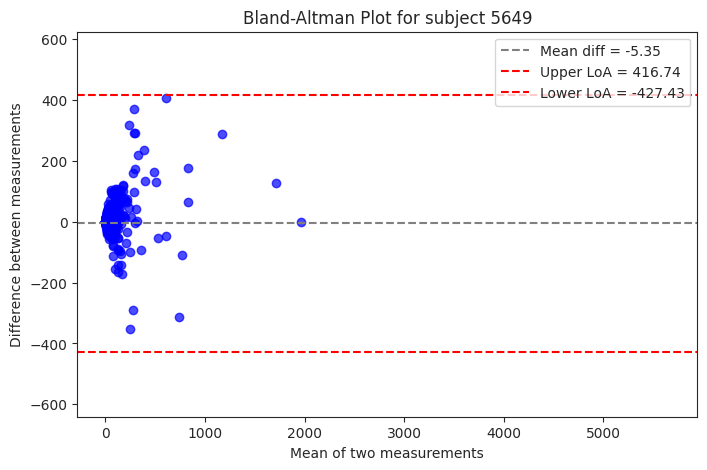

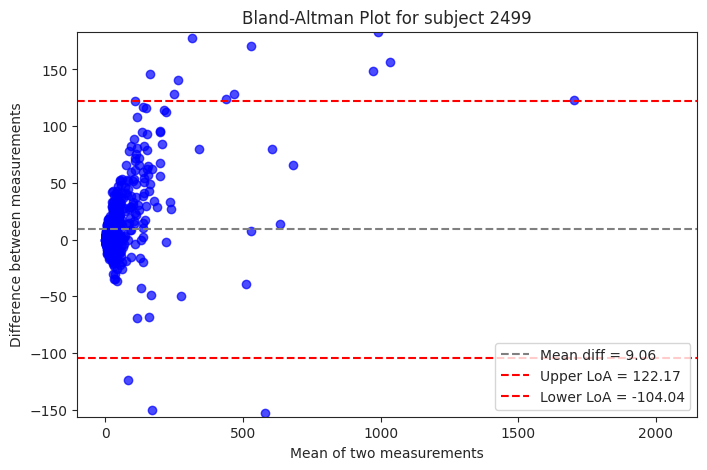

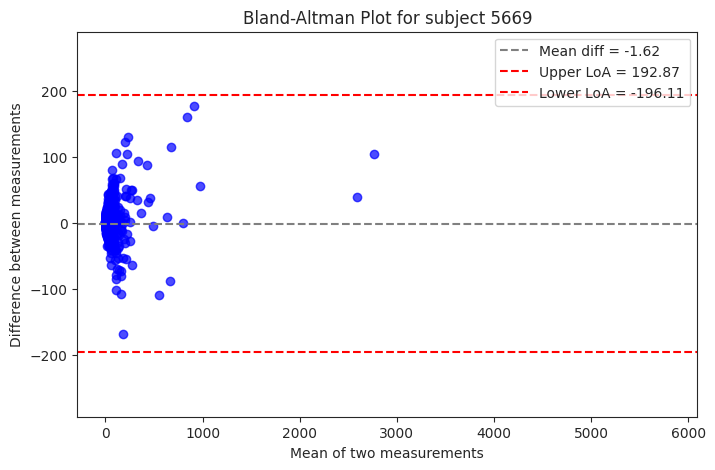

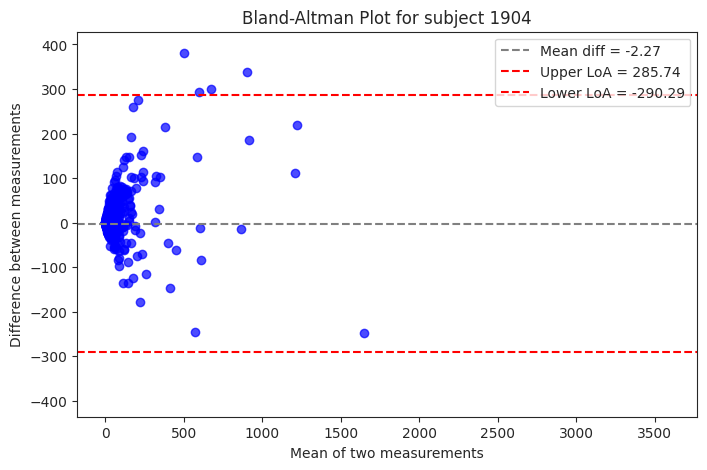

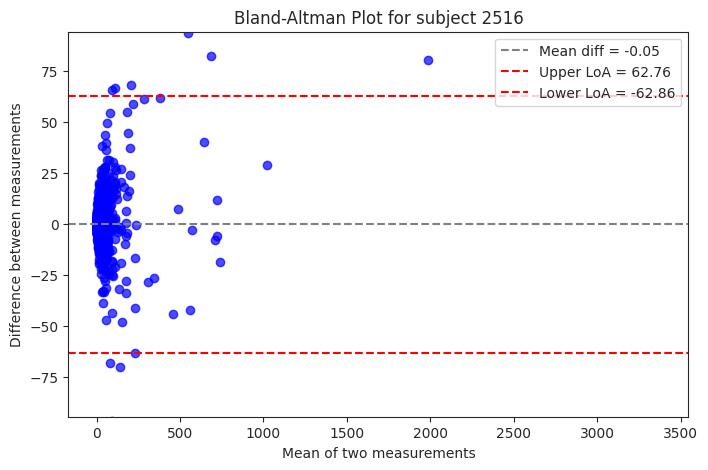

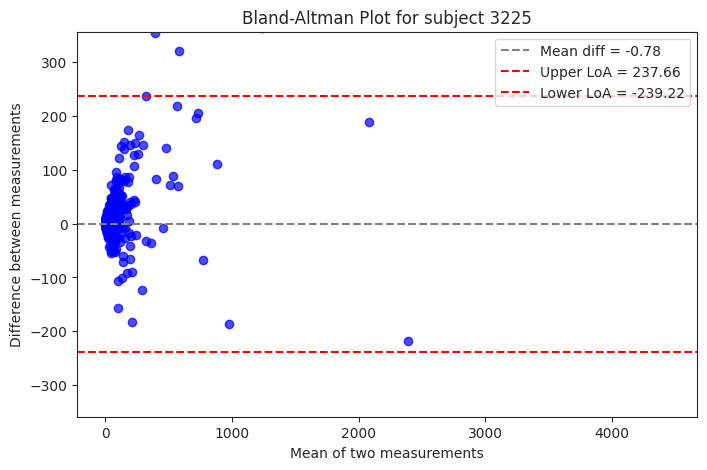

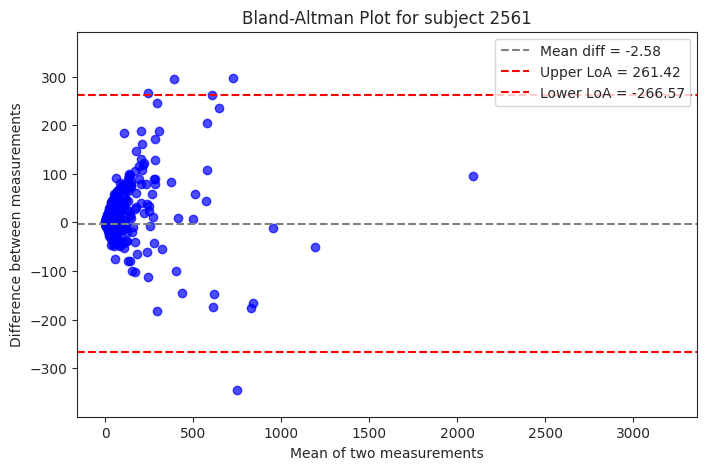

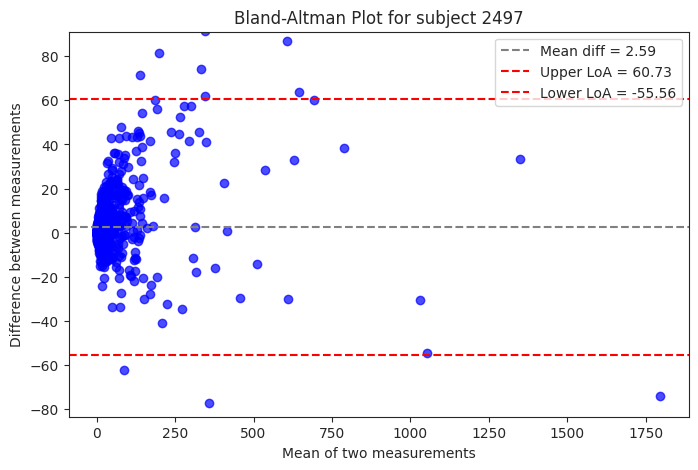

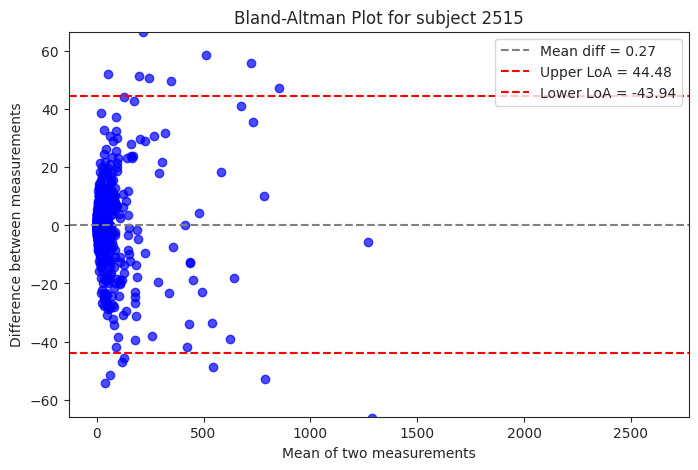

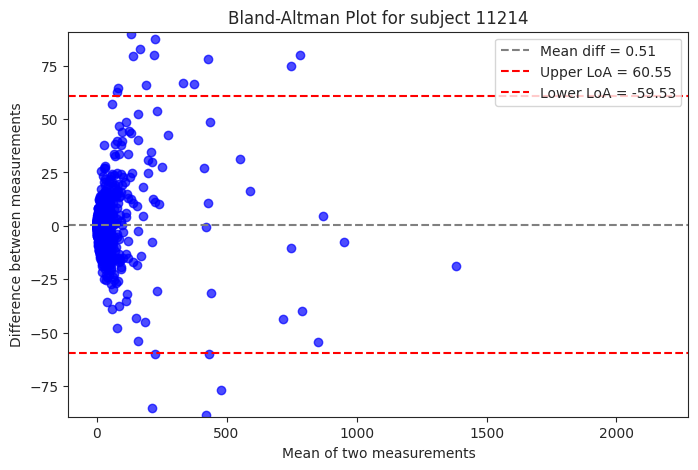

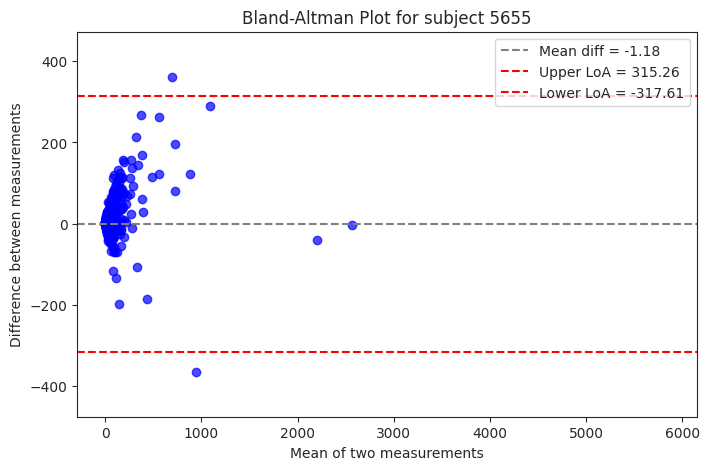

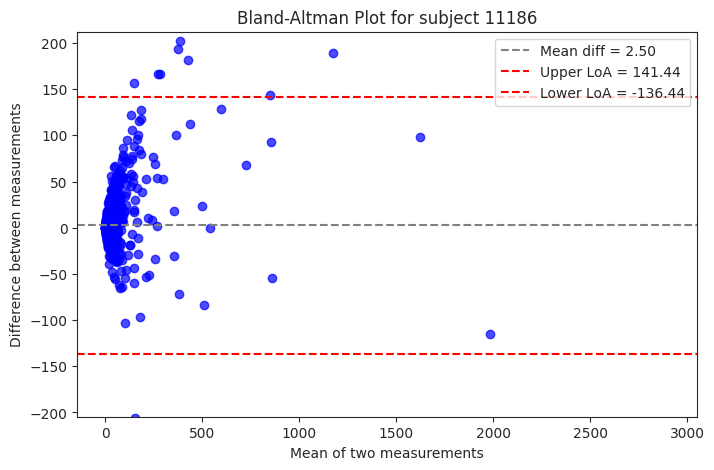

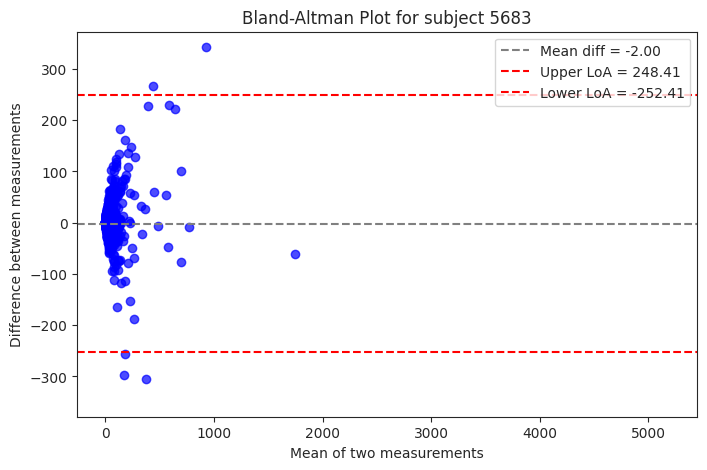

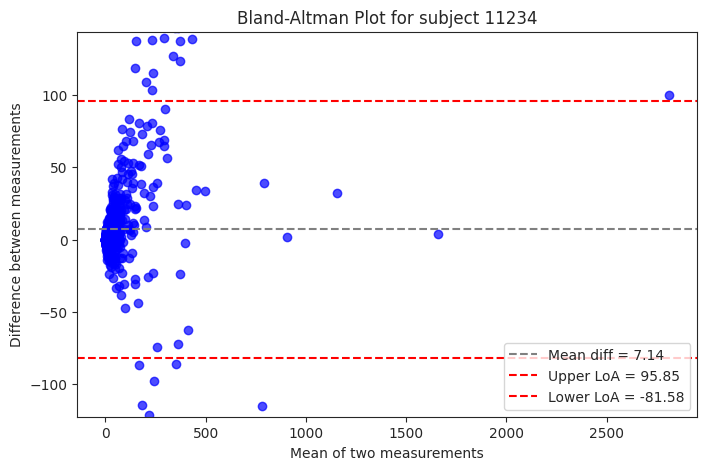

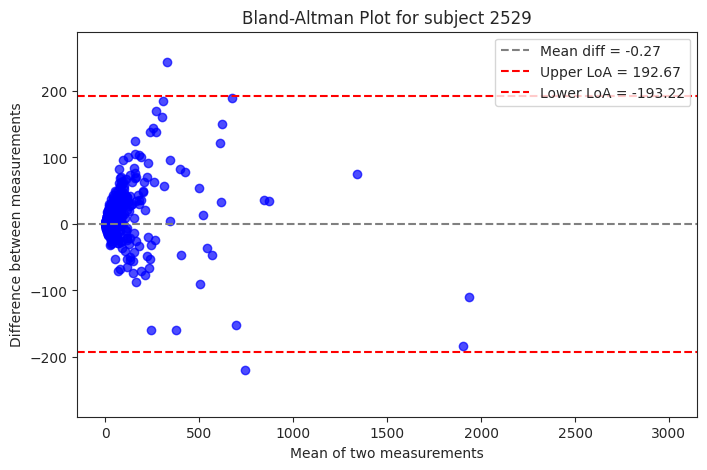

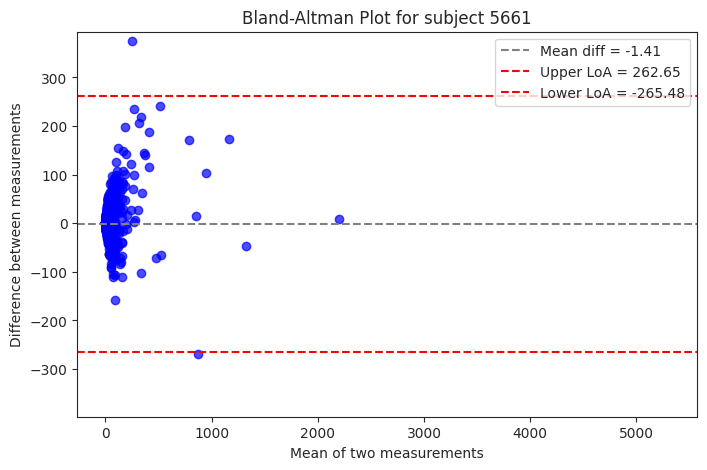

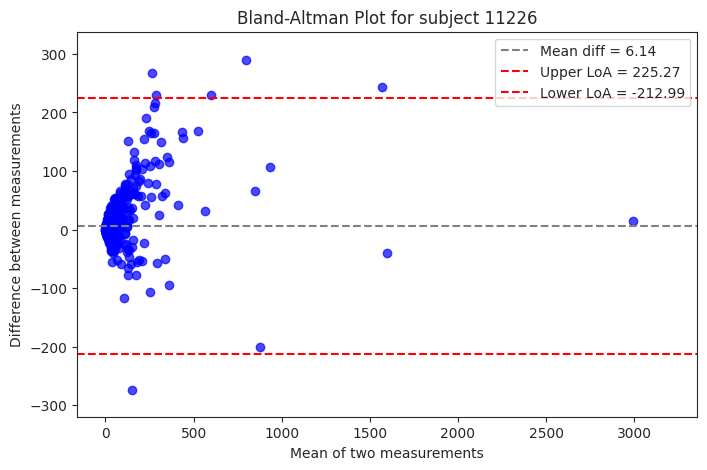

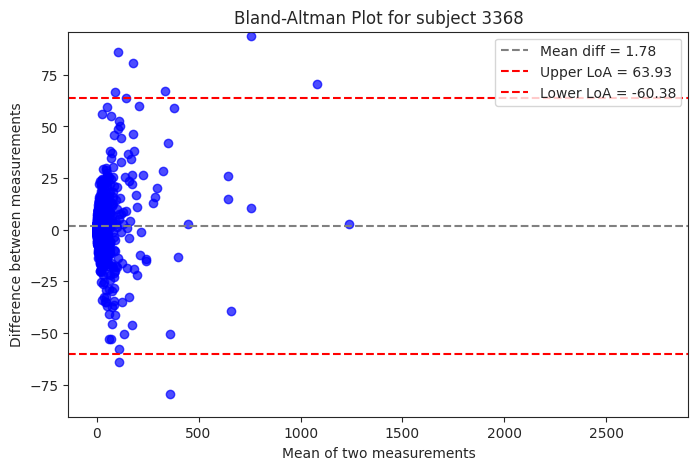

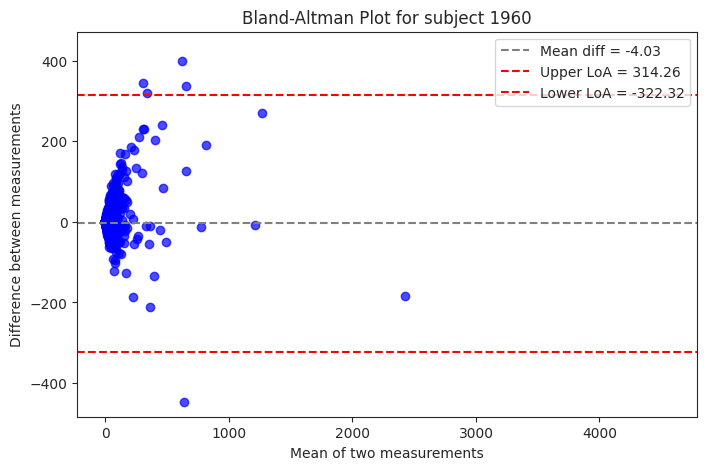

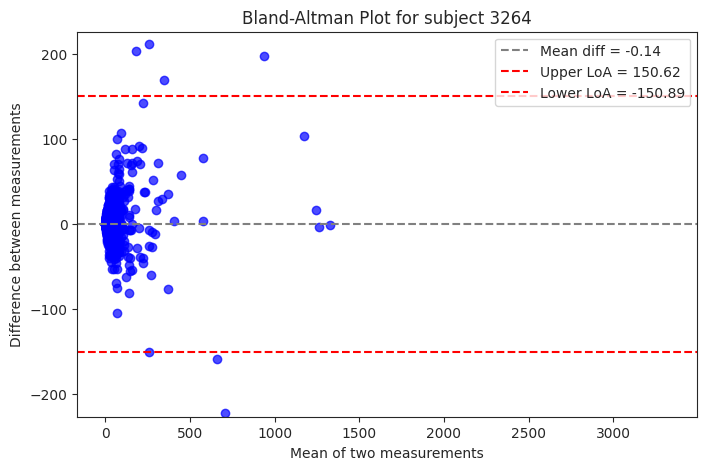

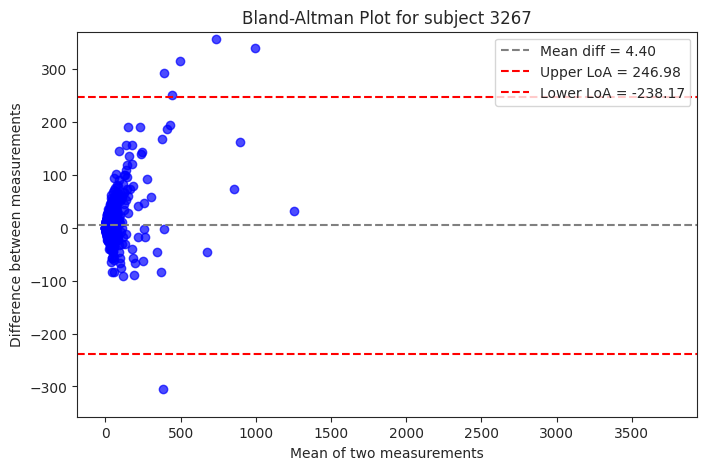

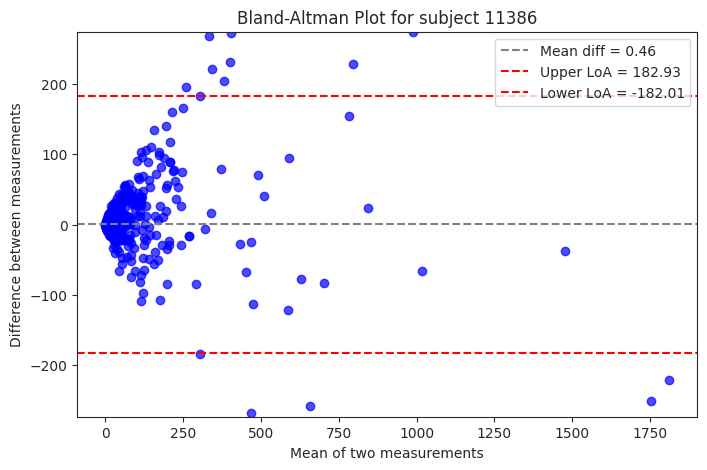

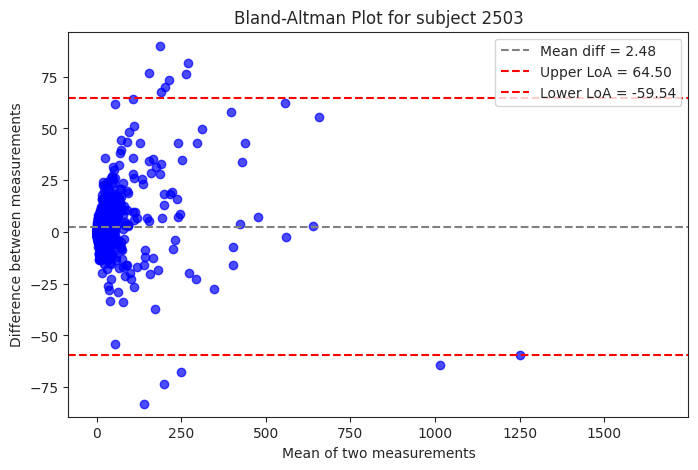

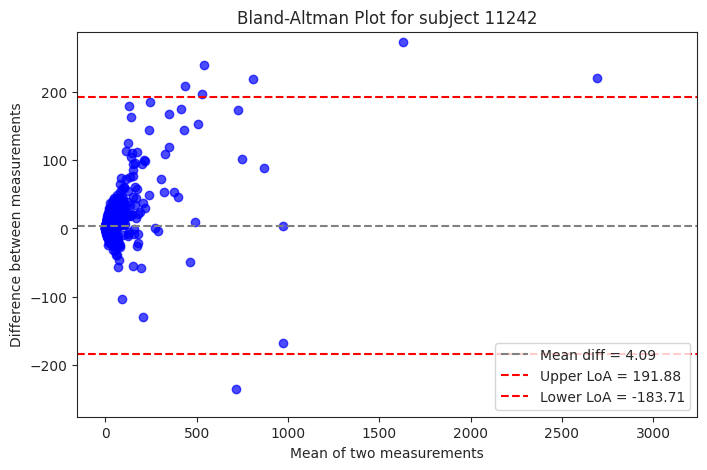

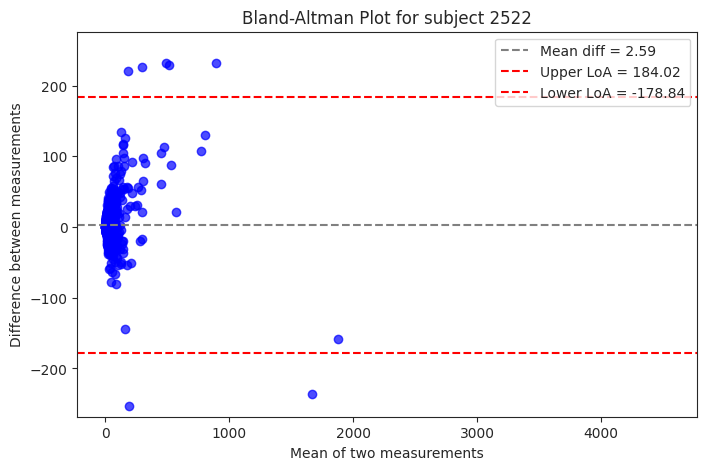

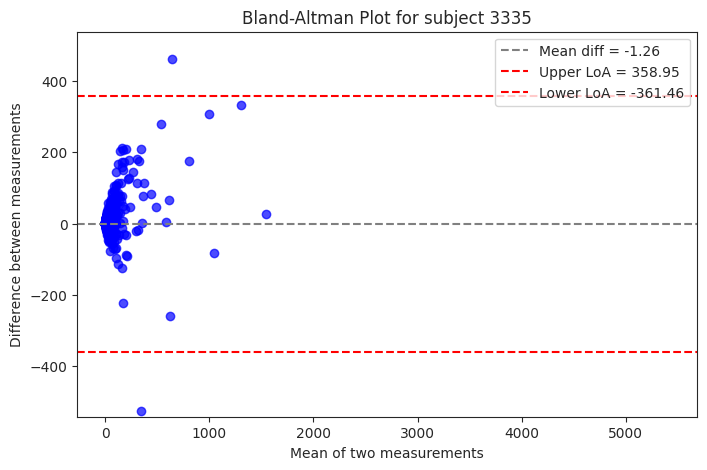

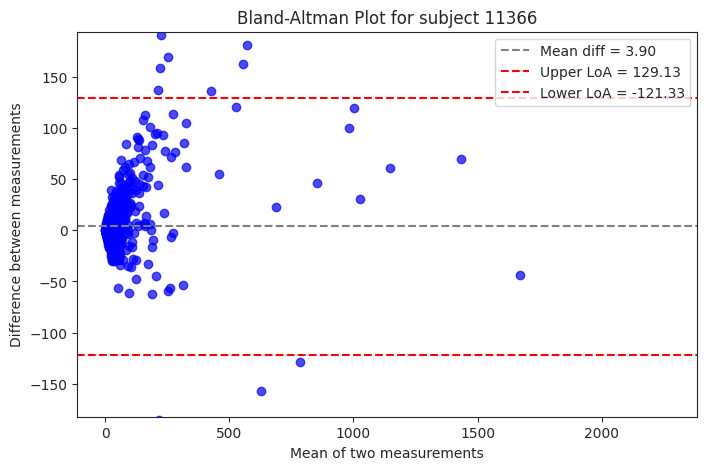

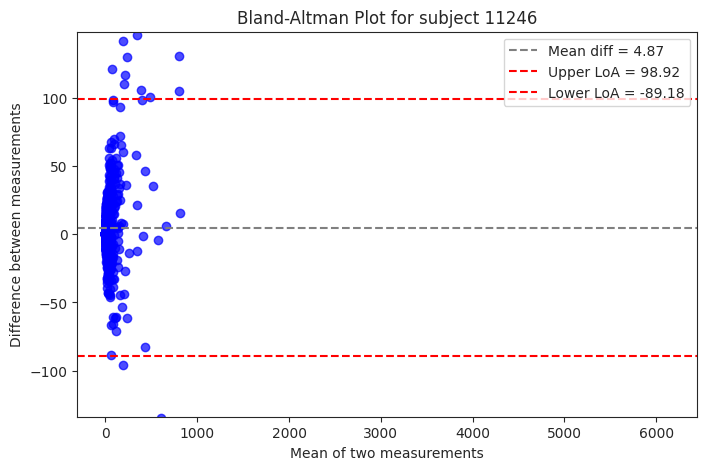

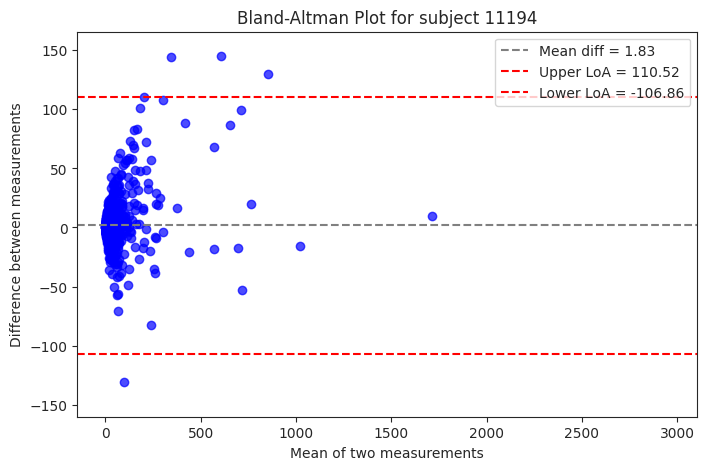

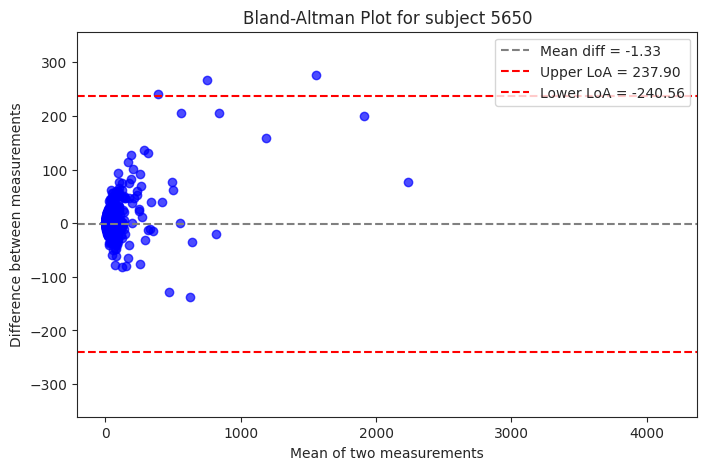

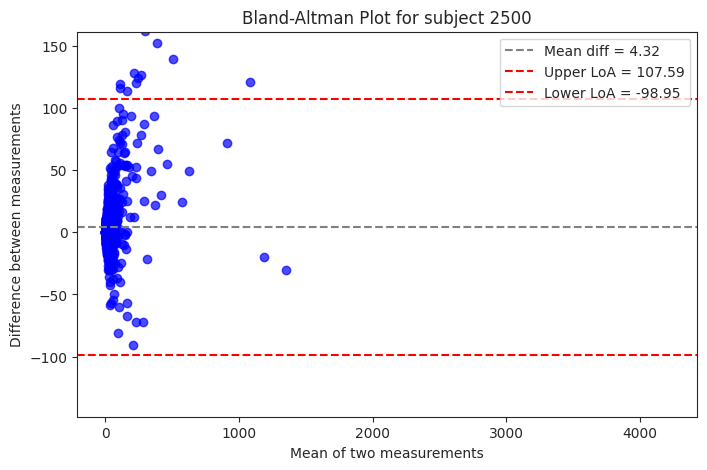

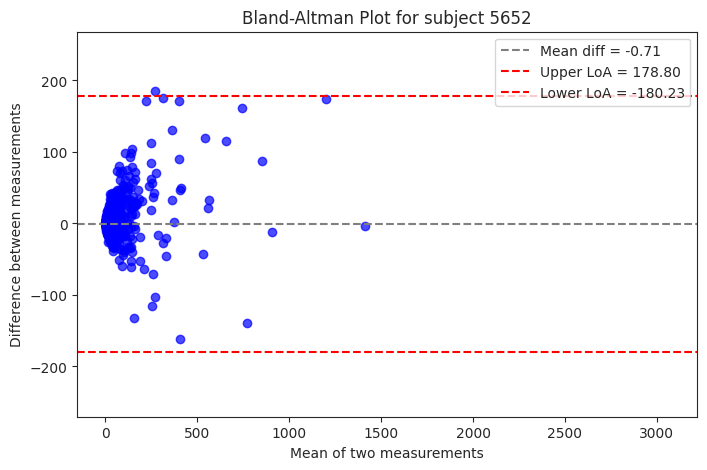

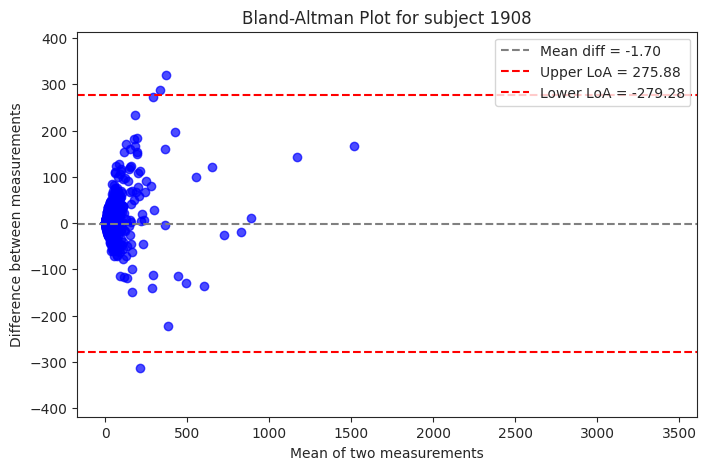

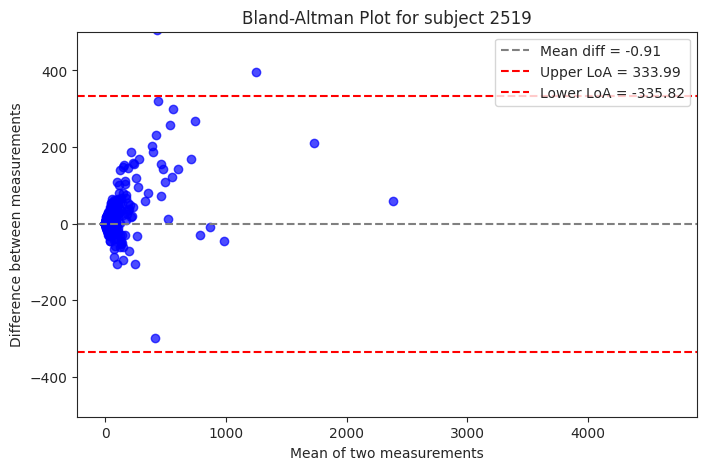

In [12]:
for col in cols_with_replicates:
    plot_bland_altman(patients_df[f"{col}-r1"], patients_df[f"{col}-r2"], f"Bland-Altman Plot for subject {col}")